<center>
<h2><font color = Dark red> Homework 3 (ISyE 601 - Machine Learning in Action) </font></h2>
<h5> Name: Radhika Kulkarni
<h5> Student Number: 9081413834 <h5>
<hr>    
</center>

<h7><u><b> Problem 1 : Predicting invasive species </b></u></h7>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read training set data

speciesdata = pd.read_csv('Train.csv')
speciesdata.head()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
0,3228,282,14,247,30,886,181,240,199,1357,...,0,0,0,0,0,0,0,0,0,0
1,2054,17,25,335,-126,685,191,178,114,721,...,0,0,0,0,0,0,0,0,0,0
2,2173,298,29,228,110,636,126,215,222,865,...,0,0,0,0,0,0,0,0,0,0
3,3283,315,1,234,17,5950,216,237,159,484,...,0,0,0,0,0,0,0,0,0,1
4,2795,84,7,247,17,3073,231,227,129,6569,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Normalize feature values to (0,1) range

from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler(copy=True, feature_range=(0,1))

speciesdf1 = MMS.fit_transform(speciesdata)

speciesdf1 = pd.DataFrame(speciesdf1, columns = speciesdata.columns)

speciesdf1.head()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
0,0.684842,0.783333,0.212121,0.176807,0.262953,0.124491,0.712598,0.944882,0.783465,0.189182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.097549,0.047222,0.378788,0.239800,0.060881,0.096248,0.751969,0.700787,0.448819,0.100516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.157079,0.827778,0.439394,0.163207,0.366580,0.089363,0.496063,0.846457,0.874016,0.120591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.712356,0.875000,0.015152,0.167502,0.246114,0.836026,0.850394,0.933071,0.625984,0.067475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.468234,0.233333,0.106061,0.176807,0.246114,0.431783,0.909449,0.893701,0.507874,0.915795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Check for presence of NA/missing values

speciesdf1.isnull().sum()

Elevation     0
Aspect        0
Slope         0
HdistWater    0
VdistWater    0
HdistRoad     0
Shade9        0
Shade12       0
Shade3        0
HdistFire     0
WArawah       0
Waneota       0
Wacomanche    0
Wacache       0
Soil1         0
Soil2         0
Soil3         0
Soil4         0
Soil5         0
Soil6         0
Soil7         0
Soil8         0
Soil9         0
Soil10        0
Soil11        0
Soil12        0
Soil13        0
Soil14        0
Soil15        0
Soil16        0
Soil17        0
Soil18        0
Soil19        0
Soil20        0
Soil21        0
Soil22        0
Soil23        0
Soil24        0
Soil25        0
Soil26        0
Soil27        0
Soil28        0
Soil29        0
Soil30        0
Soil31        0
Soil32        0
Soil33        0
Soil34        0
Soil35        0
Soil36        0
Soil37        0
Soil38        0
Soil39        0
Soil40        0
Target        0
dtype: int64

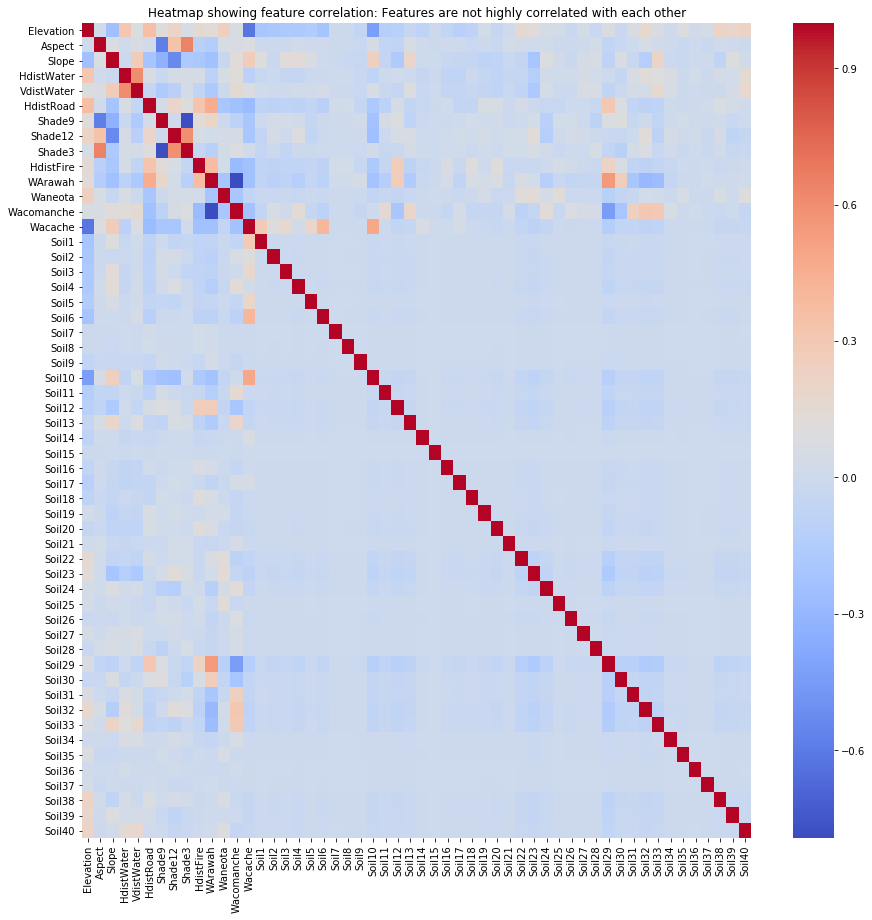

In [5]:
# Create heatmap to check for feature correlation (Threshold used : 0.8)

import matplotlib

X = speciesdf1.iloc[:,:-1]
Y = speciesdf1['Target']

import seaborn as sns

fig = plt.figure(figsize=(15,15))
plt.title("Heatmap showing feature correlation: Features are not highly correlated with each other")
sns.heatmap(X.corr(),cmap='coolwarm',annot=False)

fig.savefig('Heatmap.png')

In [10]:
# Random Forest model with Grid Search across different hyperparameters
# Since the training data set is quite large, a smaller number of parameters are selected here

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

X_train = speciesdf1.drop(columns = ['Target'], axis = 1)
Y_train = speciesdf1['Target']

RFmod = RandomForestClassifier(random_state=0)

RFparams={'n_estimators':[10, 50, 100, 200],'max_features':['auto',None],
          'max_depth':[5,10],'min_samples_leaf':[3,10],
          'class_weight':[None,'balanced']}

mod1 = GridSearchCV(RFmod, RFparams, cv=3, scoring='roc_auc')
mod1.fit(X_train,Y_train)
#mod1.cv_results_['mean_test_score']

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [50]:
# AUC score for every hyperparameter combination

mod1.cv_results_['mean_test_score']

array([0.83063353, 0.84194228, 0.84341401, 0.84392945, 0.83012446,
       0.84199112, 0.84335639, 0.84392115, 0.85176163, 0.8553099 ,
       0.85549406, 0.85548848, 0.85176187, 0.85531095, 0.85549452,
       0.85548689, 0.88819764, 0.89462182, 0.89484682, 0.89529115,
       0.88636028, 0.89308764, 0.89345378, 0.89388636, 0.92676668,
       0.93092184, 0.93146178, 0.9315885 , 0.92599693, 0.93010182,
       0.93063114, 0.93074719, 0.83121086, 0.84420894, 0.84412999,
       0.84425518, 0.83070026, 0.84413245, 0.84406812, 0.84416089,
       0.84942536, 0.8538838 , 0.85454333, 0.85435455, 0.84942535,
       0.85388145, 0.854542  , 0.85435488, 0.88687536, 0.89293184,
       0.89366771, 0.89406137, 0.88938152, 0.89306223, 0.89322112,
       0.89319334, 0.92351705, 0.92820464, 0.92897633, 0.92917088,
       0.92282733, 0.92744841, 0.92821658, 0.92838768])

In [13]:
# Gives the best hyperparameter combination

mod1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

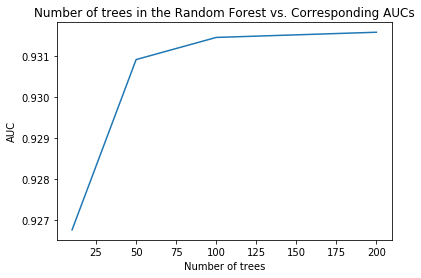

In [54]:
# Plot AUC score for different number of trees while keeping other best estimator hyperparameters constant

mod_random = RandomForestClassifier(random_state=0, class_weight = None, max_depth = 10, max_features = None, min_samples_leaf = 3)
params_random={'n_estimators':[10, 50, 100, 200]}

modRF = GridSearchCV(mod_random, params_random, cv=3, scoring='roc_auc')

modRF.fit(X_train, Y_train)

results = modRF.cv_results_['mean_test_score']
trees = params_random['n_estimators']

plt.plot(trees, results)
plt.title('Number of trees in the Random Forest vs. Corresponding AUCs')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.show()

In [14]:
# Read Validation set data

Val = pd.read_csv("Val.csv")
Val.head()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
0,3377,90,2,499,38,1440,222,236,150,2387,...,1,0,0,0,0,0,0,0,0,0
1,3389,236,23,324,134,3378,174,253,209,582,...,0,0,0,0,0,0,0,1,0,1
2,2962,19,9,30,-2,3658,214,222,144,1072,...,0,0,0,0,0,0,0,0,0,1
3,3213,21,13,234,25,1445,211,212,135,1060,...,0,0,0,0,0,0,0,1,0,1
4,2932,263,23,395,34,5604,158,244,221,5727,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Normalize validation set feature values to (0,1) range

MMS1 = MinMaxScaler(copy=True, feature_range=(0,1))

speciesdf_val = MMS1.fit_transform(Val)

speciesdf_val = pd.DataFrame(speciesdf_val, columns = Val.columns)

speciesdf_val.head()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
0,0.760020,0.250000,0.031746,0.358993,0.263089,0.203046,0.874016,0.929134,0.592885,0.332822,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.766032,0.655556,0.365079,0.233094,0.388743,0.476311,0.685039,0.996063,0.826087,0.081149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.552104,0.052778,0.142857,0.021583,0.210733,0.515792,0.842520,0.874016,0.569170,0.149470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.677856,0.058333,0.206349,0.168345,0.246073,0.203751,0.830709,0.834646,0.533597,0.147797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.537074,0.730556,0.365079,0.284173,0.257853,0.790186,0.622047,0.960630,0.873518,0.798522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


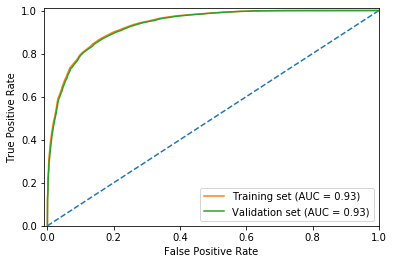

In [48]:
# Predict target probabilities of validation set data using the Random Forest model trained above (Best estimator)
# Plot ROC curves to compare training set and validation set performance

from sklearn.metrics import roc_curve, roc_auc_score, auc

X_val = speciesdf_val.drop(columns = ['Target'], axis = 1)
Y_val = speciesdf_val['Target']

pred_train = mod1.best_estimator_.predict_proba(X_train).T[1]
fpr1, tpr1, thresh1 = roc_curve(Y_train, pred_train)
roc_auc_train= roc_auc_score(Y_train, pred_train)

pred_val = mod1.best_estimator_.predict_proba(X_val).T[1]
fpr2, tpr2, thresh2 = roc_curve(Y_val, pred_val)
roc_auc_val= roc_auc_score(Y_val, pred_val)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, label='Training set (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr2, tpr2, label='Validation set (AUC = %0.2f)' % roc_auc_val)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

In [33]:
# Train a classic logistic regression model by searching over hyperparameter choices and determining the best combination

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegressionCV

mod2 = LogisticRegressionCV(cv = 10, scoring = 'roc_auc',fit_intercept=True, random_state=0, max_iter = 1000)

mod2.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=0, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)

In [41]:
# Fit model to training set data using best hyperparameter combination as determined above (L2 regularized)

from sklearn.linear_model import LogisticRegression

Logreg = LogisticRegression(C = 10, solver = 'lbfgs', penalty = 'l2', fit_intercept=True, random_state = 0, max_iter = 1000)

Logreg.fit(X_train, Y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

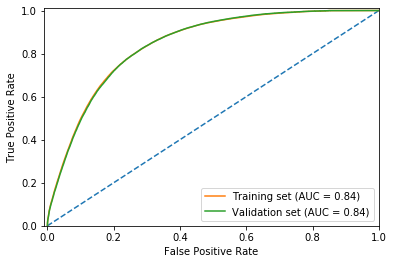

In [52]:
# Predict target probabilities of validation set data using the logistic regression model trained above (Best combination)
# Plot ROC curves to compare training set and validation set performance

pred_train1 = Logreg.predict_proba(X_train).T[1]
fpr1_1, tpr1_1, thresh1_1 = roc_curve(Y_train, pred_train1)
roc_auc_train1= roc_auc_score(Y_train, pred_train1)

pred_val1 = Logreg.predict_proba(X_val).T[1]
fpr1_2, tpr1_2, thresh1_2 = roc_curve(Y_val, pred_val1)
roc_auc_val1= roc_auc_score(Y_val, pred_val1)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1_1, tpr1_1, label='Training set (AUC = %0.2f)' % roc_auc_train1)
plt.plot(fpr1_2, tpr1_2, label='Validation set (AUC = %0.2f)' % roc_auc_val1)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

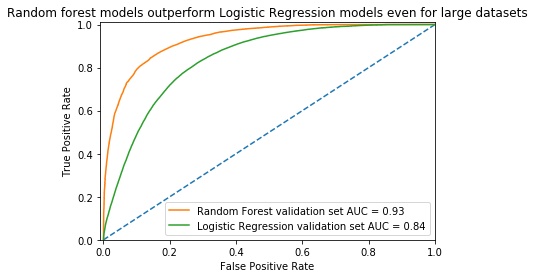

In [56]:
# Comparison of the above models

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr2, tpr2, label='Random Forest validation set AUC = %0.2f' % roc_auc_val)
plt.plot(fpr1_2, tpr1_2, label='Logistic Regression validation set AUC = %0.2f' % roc_auc_val1)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Random forest models outperform Logistic Regression models even for large datasets')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

<h7> Since the Random Forest model gives better prediction accuracy, it will be used for the rest of the problem. The code below shows its performance on the test set data. </h7>

In [ ]:
# Read Test set data

Testdf = pd.read_csv("Test.csv")
Testdf.head()

In [ ]:
# Normalize feature values to (0,1) range

MMS_test = MinMaxScaler(copy=True, feature_range=(0,1))

Testdf_1 = MMS_test.fit_transform(Testdf)

Testdf_1 = pd.DataFrame(Testdf_1, columns = Testdf.columns)

Testdf_1.head()

In [ ]:
# Predict target probabilities of Test set data using the Random Forest model trained above

pred_test = mod1.best_estimator_.predict_proba(X_test).T[1]
fpr_test, tpr_test, thresh_test = roc_curve(Y_test, pred_test)
roc_auc_test= roc_auc_score(Y_test, pred_test)

print("The AUC for the test set is : " + str(roc_auc_test))

In [ ]:
# Plot ROC for the above predictions

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test, tpr_test, label='Random Forest test set AUC = %0.2f' % roc_auc_test)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Random forest performance using Test set data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()